In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


In [5]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{base_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = (city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | puno
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | port isabel
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | katra
Processing Record 11 of Set 1 | antsohihy
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | nogales
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | mirny
Processing Record 16 of Set 1 | kailua-kona
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | mawu
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | keflavik
Processing Record 21 of Set 1 | marabba
Processing Record 22 of Set 1 | scarborough
Processing Record 23 of Set 1 | fuvahmu

Processing Record 40 of Set 4 | saint-philippe
Processing Record 41 of Set 4 | prineville
Processing Record 42 of Set 4 | woolgoolga
Processing Record 43 of Set 4 | broome
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | zaozersk
Processing Record 46 of Set 4 | holualoa
Processing Record 47 of Set 4 | half moon bay
Processing Record 48 of Set 4 | lodwar
Processing Record 49 of Set 4 | plouzane
Processing Record 0 of Set 5 | santa ana de yacuma
Processing Record 1 of Set 5 | strezhevoy
Processing Record 2 of Set 5 | mitu
Processing Record 3 of Set 5 | kodinsk
Processing Record 4 of Set 5 | vikulovo
Processing Record 5 of Set 5 | nizhnyaya poyma
Processing Record 6 of Set 5 | santa cruz del sur
Processing Record 7 of Set 5 | wewak
Processing Record 8 of Set 5 | benjamin aceval
Processing Record 9 of Set 5 | kapa'a
Processing Record 10 of Set 5 | esmeraldas
Processing Record 11 of Set 5 | san luis de la loma
Processing Record 12 of Set 5 | celestun
Processing Record 1

Processing Record 30 of Set 8 | barreirinhas
Processing Record 31 of Set 8 | lafiagi
Processing Record 32 of Set 8 | chilliwack
Processing Record 33 of Set 8 | crucecita
Processing Record 34 of Set 8 | bovec
Processing Record 35 of Set 8 | karratha
Processing Record 36 of Set 8 | makhambet
Processing Record 37 of Set 8 | tartagal
Processing Record 38 of Set 8 | santa vitoria do palmar
Processing Record 39 of Set 8 | pinheiro machado
Processing Record 40 of Set 8 | codrington
Processing Record 41 of Set 8 | la sarre
Processing Record 42 of Set 8 | conneaut
Processing Record 43 of Set 8 | kavieng
Processing Record 44 of Set 8 | gaigeturi
Processing Record 45 of Set 8 | kili
Processing Record 46 of Set 8 | dunedin
Processing Record 47 of Set 8 | la ronge
Processing Record 48 of Set 8 | al jahra'
Processing Record 49 of Set 8 | tonj
Processing Record 0 of Set 9 | monki
Processing Record 1 of Set 9 | valparaiso
Processing Record 2 of Set 9 | amos
Processing Record 3 of Set 9 | nilsia
Proces

Processing Record 20 of Set 12 | nouadhibou
Processing Record 21 of Set 12 | chui
Processing Record 22 of Set 12 | omuthiya
City not found. Skipping...
Processing Record 23 of Set 12 | gadzhiyevo
Processing Record 24 of Set 12 | alice springs
Processing Record 25 of Set 12 | cadale
Processing Record 26 of Set 12 | dolores
Processing Record 27 of Set 12 | deogarh
Processing Record 28 of Set 12 | susuman
Processing Record 29 of Set 12 | voi
Processing Record 30 of Set 12 | paradera
City not found. Skipping...
Processing Record 31 of Set 12 | ust'-barguzin
Processing Record 32 of Set 12 | mbaiki
Processing Record 33 of Set 12 | byron bay
Processing Record 34 of Set 12 | skutskar
City not found. Skipping...
Processing Record 35 of Set 12 | quellon
Processing Record 36 of Set 12 | lysekil
Processing Record 37 of Set 12 | isiro
Processing Record 38 of Set 12 | utete
Processing Record 39 of Set 12 | chadan
Processing Record 40 of Set 12 | juye
Processing Record 41 of Set 12 | west mackay
Proc

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df=city_data_df[["City", "Lat","Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0      bredasdorp -34.5322   20.0403     17.01        65         100   
1           tiksi  71.6872  128.8694    -23.03       100         100   
2            puno -15.8333  -70.0333     13.95        33          41   
3        waitangi -43.9535 -176.5597     16.57        92         100   
4  puerto natales -51.7236  -72.4875     13.25        50          75   

   Wind Speed Country        Date  
0        1.18      ZA  1681934069  
1        1.45      RU  1681933995  
2        4.59      PE  1681934072  
3        4.02      NZ  1681934073  
4       14.40      CL  1681934073

In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

# Create the Scatter Plots Requested
Latitude Vs. Temperature¶

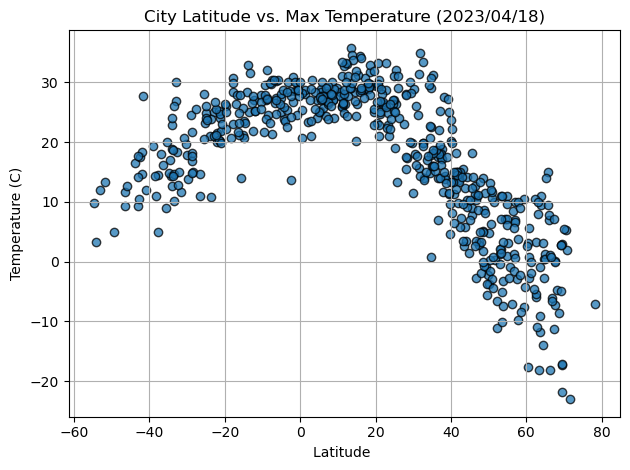

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.75, edgecolors="k")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Max Temperature (2023/04/18)')
plt.xlabel("Latitude ")
plt.ylabel("Temperature (C)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# Latitude Vs. Humidity 

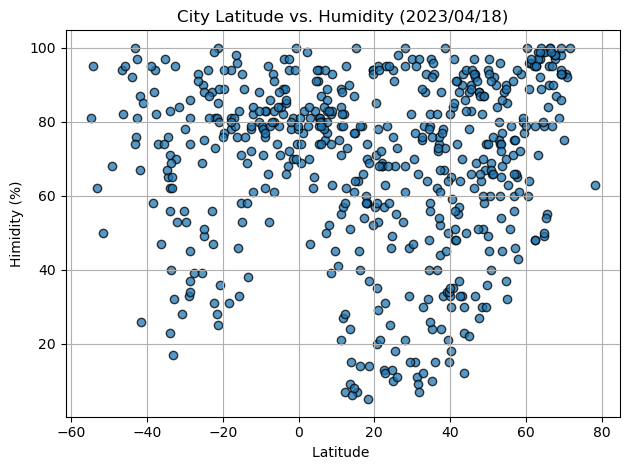

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.75, edgecolors="k")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Humidity (2023/04/18)')
plt.xlabel("Latitude ")
plt.ylabel("Himidity (%)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

# Latitude Vs. Cloudiness

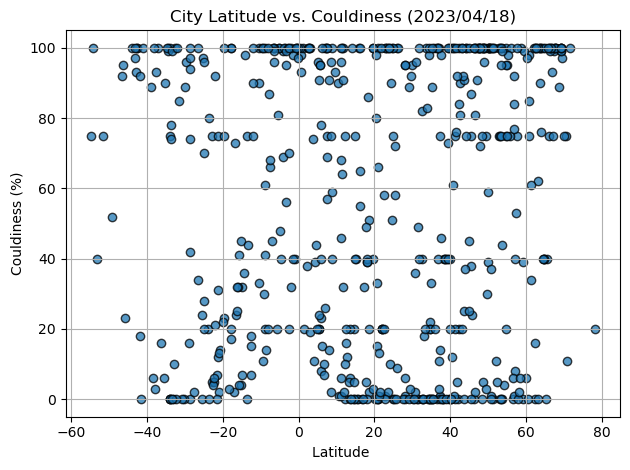

In [12]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.75, edgecolors="k")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Couldiness (2023/04/18)')
plt.xlabel("Latitude ")
plt.ylabel("Couldiness (%)")
plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

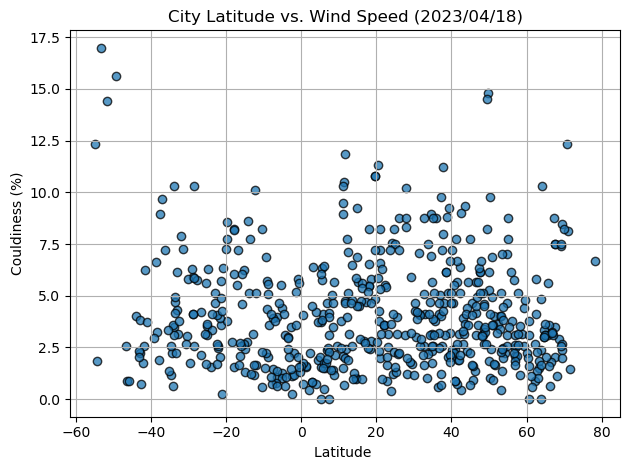

In [13]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.75, edgecolors="k")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Wind Speed (2023/04/18)')
plt.xlabel("Latitude ")
plt.ylabel("Couldiness (%)")
plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
1        tiksi  71.6872  128.8694    -23.03       100         100        1.45   
5     bilibino  68.0546  166.4372     -4.72        87         100        1.10   
6      iqaluit  63.7506  -68.5145     -9.15        92         100        0.00   
7  port isabel  26.0734  -97.2086     29.05        73         100        8.75   
9        katra  32.9833   74.9500     13.98        79          18        4.12   

  Country        Date  
1      RU  1681933995  
5      RU  1681934074  
6      CA  1681934075  
7      US  1681934075  
9      IN  1681934076

In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0      bredasdorp -34.5322   20.0403     17.01        65         100   
2            puno -15.8333  -70.0333     13.95        33          41   
3        waitangi -43.9535 -176.5597     16.57        92         100   
4  puerto natales -51.7236  -72.4875     13.25        50          75   
8       adamstown -25.0660 -130.1015     24.90        75          70   

   Wind Speed Country        Date  
0        1.18      ZA  1681934069  
2        4.59      PE  1681934072  
3        4.02      NZ  1681934073  
4       14.40      CL  1681934073  
8        3.55      PN  1681934076

# Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.57x + 35.56
The r-squared is: -0.8629749368600242


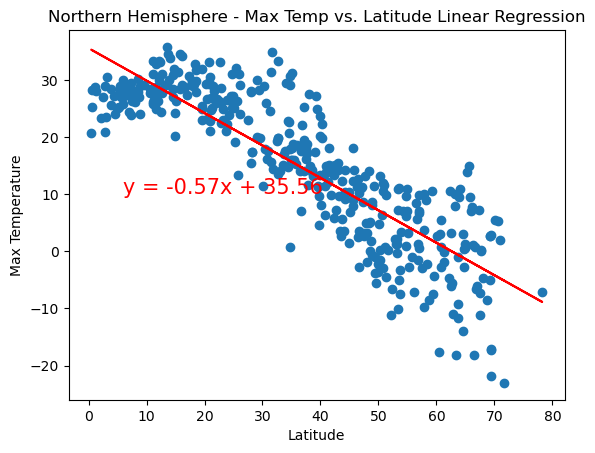

In [27]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

Regression line equation is: y = 0.35x + 29.5
The r-squared is: 0.7594803782706808


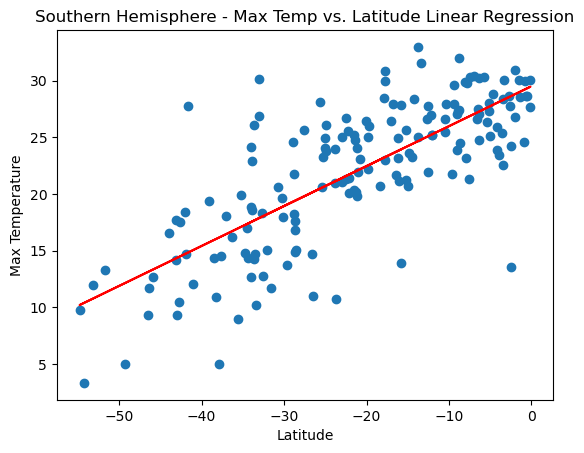

In [38]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

# Discussion about the linear relationship:
In the nothern hemisphere, the regression displays a negative correlation. Hence, as you move away from the equator the temperature decreases.
In the southern hemisphere, the regression displays a positive correlation. Hence, as you get closer to the equator the temperature increases.

# Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.25x + 58.16
The r-squared is: 0.19753043688364327


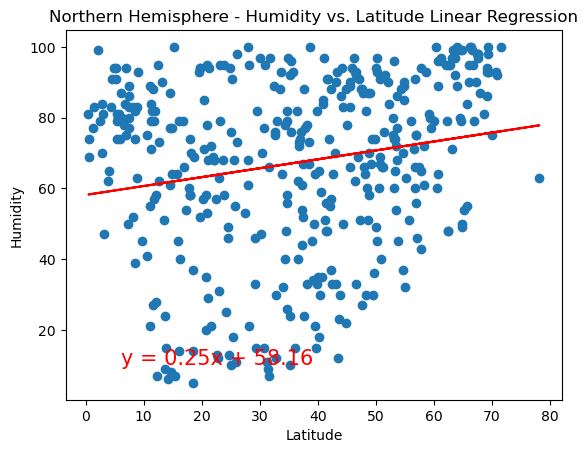

In [31]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

Regression line equation is: y = 0.23x + 77.88
The r-squared is: 0.16385510009005735


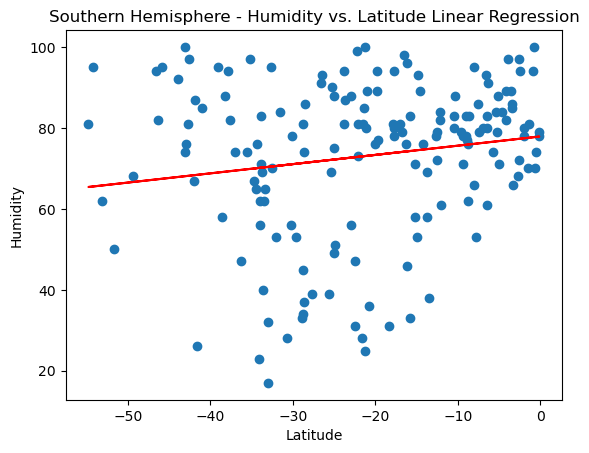

In [32]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

# Discussion about the linear relationship: 
The regression does not display much of a correlation between the data sets.

# Cloudiness vs. Latitude Linear Regression Plot¶

Regression line equation is: y = 0.4x + 40.17
The r-squared is: 0.19041377982432114


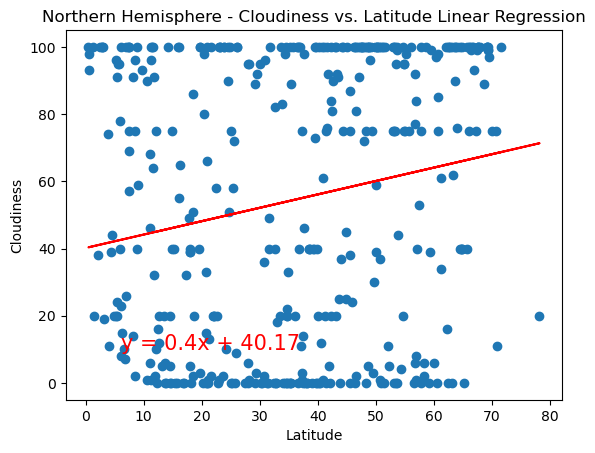

In [33]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

Regression line equation is: y = 0.17x + 60.36
The r-squared is: 0.058182428588787784


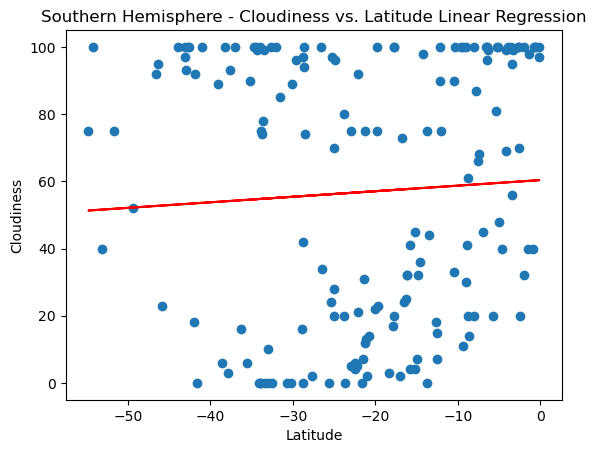

In [34]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

# Discussion about the linear relationship:
The regression does not display much of a correlation between the data sets.

# Wind Speed vs. Latitude Linear Regression Plot¶

Regression line equation is: y = 0.0x + 4.03
The r-squared is: 0.0022390526826928134


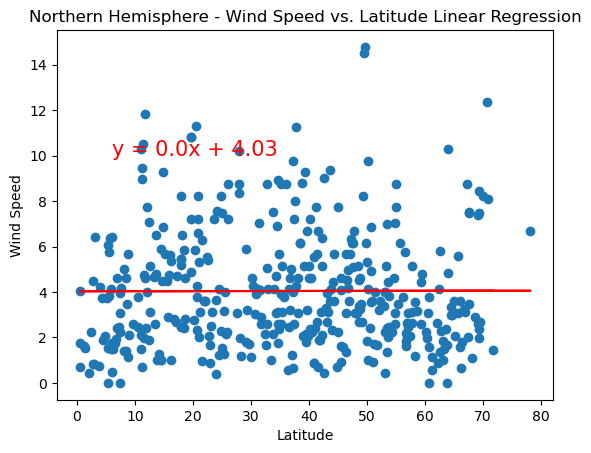

In [35]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

Regression line equation is: y = -0.06x + 2.67
The r-squared is: -0.3024379618842757


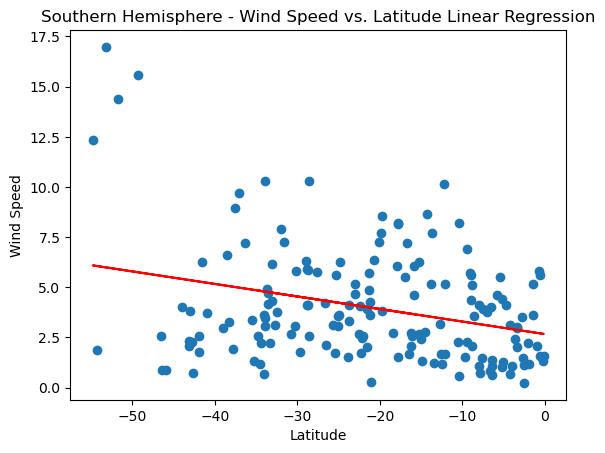

In [40]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

# Discussion about the linear relationship:
The regression does not display much of a correlation between the data sets.